In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv("q:/Data.3/learn-data-analysis-w-python-master/datasets/gradedata.csv")

In [37]:
df[df.grade < 0]

,fname,lname,gender,age,exercise,hours,grade,address


In [38]:
df.notnull().shape

(2000, 8)

In [39]:
df.shape

(2000, 8)

In [40]:
def filter_by_quantile_range(dataFrame, columnName, minQ = 0.25, maxQ = 0.75, multiplier = 1.5):
    if multiplier <= 0.0:
        raise ValueError
        
    if (minQ < 0.0) or (maxQ > 1.0) or (minQ > maxQ):
        raise valueError
        
    series = dataFrame[columnName]
    
    mean = series.mean()
        
    valueMinQ = series.quantile(minQ)
    valueMaxQ = series.quantile(maxQ)
    interquartileRange = (valueMaxQ - valueMinQ) * multiplier
    
    minLimit = mean - interquartileRange
    maxLimit = mean + interquartileRange
    
    preFiltered = dataFrame[series >= minLimit]
    
    series = preFiltered[columnName]
    
    filtered = preFiltered[series <= maxLimit]
    
    return filtered    
    

In [41]:
def filter_by_std(dataFrame, columnName, multiplier = 1.96):
    if multiplier <= 0.0:
        raise ValueError
        
    series = dataFrame[columnName]
    
    mean = series.mean()
    std = series.std() * multiplier
        
    minLimit = mean - std
    maxLimit = mean + std
    
    print(minLimit)
    print(maxLimit)
    
    preFiltered = dataFrame[series >= minLimit]
    
    series = preFiltered[columnName]
    
    filtered = preFiltered[series <= maxLimit]
    
    return filtered 

In [42]:
def filter_by_std_2(dataFrame, columnName, multiplier = 1.96):
    if multiplier <= 0.0:
        raise ValueError
        
    series = dataFrame[columnName]
    
    mean = series.mean()
    std = series.std() * multiplier
        
    minLimit = mean - std
    maxLimit = mean + std
    
    print(minLimit)
    print(maxLimit)
    
    filtered = dataFrame[(series >= minLimit) & (series <= maxLimit)]
    
    return filtered 

In [43]:
df2 = filter_by_quantile_range(df, "grade")

In [44]:
df2.shape

(1968, 8)

In [45]:
df3 = filter_by_std_2(df, "grade")

63.45076853591926
101.66133146408077


In [46]:
df3.shape

(1946, 8)

(array([   1.,    0.,    1.,    0.,    0.,    7.,   46.,  104.,  175.,
         292.,  303.,  331.,  320.,  215.,  205.]),
 array([  32.        ,   36.53333333,   41.06666667,   45.6       ,
          50.13333333,   54.66666667,   59.2       ,   63.73333333,
          68.26666667,   72.8       ,   77.33333333,   81.86666667,
          86.4       ,   90.93333333,   95.46666667,  100.        ]),
 <a list of 15 Patch objects>)

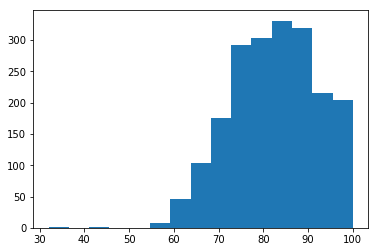

In [47]:
rng = (df["grade"].min(), df["grade"].max())

plt.hist(df["grade"], bins=15, range = rng)

(array([   0.,    0.,    0.,    0.,    0.,    0.,   23.,  104.,  175.,
         292.,  303.,  331.,  320.,  215.,  205.]),
 array([  32.        ,   36.53333333,   41.06666667,   45.6       ,
          50.13333333,   54.66666667,   59.2       ,   63.73333333,
          68.26666667,   72.8       ,   77.33333333,   81.86666667,
          86.4       ,   90.93333333,   95.46666667,  100.        ]),
 <a list of 15 Patch objects>)

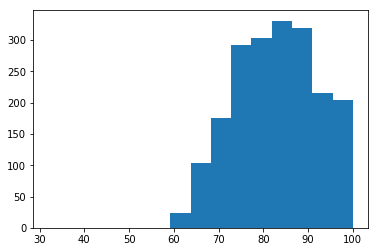

In [48]:
plt.hist(df2["grade"], bins=15, range = rng)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    1.,  104.,  175.,
         292.,  303.,  331.,  320.,  215.,  205.]),
 array([  32.        ,   36.53333333,   41.06666667,   45.6       ,
          50.13333333,   54.66666667,   59.2       ,   63.73333333,
          68.26666667,   72.8       ,   77.33333333,   81.86666667,
          86.4       ,   90.93333333,   95.46666667,  100.        ]),
 <a list of 15 Patch objects>)

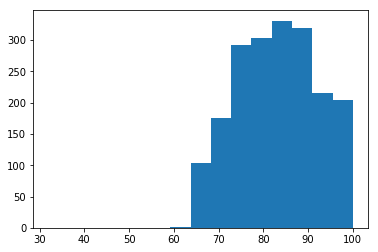

In [49]:
plt.hist(df3["grade"], bins=15, range = rng)

In [50]:
bins = [0, 50, 60, 70, 80, 90, 100]

In [51]:
dfx = df.copy()

In [52]:
dfx["grade_symbol"] = pd.cut(dfx["grade"], bins, labels = ["F","E","D","C","B","A"])

In [53]:
dfx["grade_symbol"].value_counts()

B    737
C    580
A    475
D    193
E     13
F      2
Name: grade_symbol, dtype: int64

In [54]:
dfx.groupby('grade_symbol')['hours'].mean()

grade_symbol
A    15.305263
B    11.827680
C     8.381034
D     5.544041
E     3.076923
F     9.500000
Name: hours, dtype: float64

In [55]:
dfx.head()

,fname,lname,gender,age,exercise,hours,grade,address,grade_symbol
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747",B
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780",C
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060",C
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125",B
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035",B


In [56]:
def gender_converter(gender):
    if gender == "female":
        return -1
    elif gender == "male":
        return 1
    else:
        return 0

In [57]:
dfx["gender_num"] = dfx.gender.apply(gender_converter)

In [58]:
corrx = dfx.corr()

In [59]:
dfx['grade'].groupby(dfx['gender']).mean()

gender
female    82.7173
male      82.3948
Name: grade, dtype: float64

In [60]:
dfx.groupby(dfx['gender'])['grade'].mean()

gender
female    82.7173
male      82.3948
Name: grade, dtype: float64

In [61]:
dfx.groupby(dfx['gender'])['grade'].median()

gender
female    82.6
male      83.0
Name: grade, dtype: float64

In [62]:
dfx['graderanked'] = dfx['grade'].rank(ascending=1)

In [63]:
dfx[dfx['graderanked'] < 21]

,fname,lname,gender,age,exercise,hours,grade,address,grade_symbol,gender_num,graderanked
340,Abbot,Hall,male,16,4,3,58.9,"84 Rock Creek Lane, Durham, NC 27703",E,1,7.5
388,Colton,Ochoa,male,17,1,4,60.3,"75 Arrowhead Drive, Danvers, MA 01923",D,1,18.5
410,Linda,Baldwin,female,16,5,2,59.0,"970 SW. Second Ave., Cedar Falls, IA 50613",E,-1,9.0
528,Chester,Vance,male,17,1,5,60.1,"732 Randall Mill Street, Covington, GA 30014",D,1,16.5
556,Lacey,Nieves,female,18,1,2,57.9,"38 West Brickyard Avenue, Roslindale, MA 02131",E,-1,6.0
664,Alika,Poole,female,19,2,16,32.0,"9282 Purple Finch Lane, Lexington, NC 27292",F,-1,1.0
672,Ciaran,Gay,male,19,4,3,59.3,"157 Bridge Street, Corona, NY 11368",E,1,11.0
700,Steven,Sherman,male,18,1,2,60.0,"8029 Depot Street, Port Charlotte, FL 33952",E,1,15.0
869,Tanek,Stephens,male,15,1,4,60.5,"167 Glen Eagles St., Merrimack, NH 03054",D,1,20.5
972,Keegan,Rasmussen,male,19,4,3,43.0,"876 East Pilgrim Street, Chelmsford, MA 01824",F,1,2.0


In [64]:
dfx[dfx['fname'].str.contains('Mel')]

,fname,lname,gender,age,exercise,hours,grade,address,grade_symbol,gender_num,graderanked
967,Melissa,Clay,female,17,5,13,93.9,"563 4th Rd., Ashburn, VA 20147",A,-1,1733.0
1277,Melyssa,Garner,female,17,1,6,71.3,"679 Hilldale Street, Greenville, NC 27834",C,-1,261.0
1420,Melvin,Burt,male,14,3,16,95.9,"8311 Westport Street, Jacksonville, NC 28540",A,1,1812.5
1431,Melanie,Wilson,female,15,4,13,81.5,"82 Shadow Brook Rd., Atlanta, GA 30303",B,-1,904.5


In [65]:
dfx.groupby("age")['grade'].median()

age
14    83.20
15    82.40
16    82.65
17    83.70
18    82.50
19    82.50
Name: grade, dtype: float64

In [66]:
dfx.groupby("gender")['grade'].median()

gender
female    82.6
male      83.0
Name: grade, dtype: float64

In [67]:
import statsmodels.formula.api as sm

In [68]:
result = sm.ols(formula = 'grade ~ exercise + hours', data = dfx).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1973.
Date:                Thu, 28 Jun 2018   Prob (F-statistic):               0.00
Time:                        23:40:22   Log-Likelihood:                -6300.8
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1997   BIC:                         1.262e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5316      0.447    130.828      0.000      57.654      59.409
exercise       0.9892      0.089     11.131      0.000       0.815       1.163
hours          1.9162      0.031     61.575      0.000       1.855       1.977
==============================================================================
Omnibus:                      318.721   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2158.000
Skew:                          -0.564   Prob(JB):                         0.00
Kurtosis:                       7.962   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
pd.pivot_table(dfx, index = ["hours"], columns=["gender"], values = "grade", aggfunc = "median")

gender,female,male
hours,,
0,NaN,76.80
1,NaN,72.75
2,62.20,66.45
3,69.95,66.05
4,69.15,67.25
5,71.70,69.30
6,73.10,73.80
7,74.05,73.80
8,75.55,76.20


{'boxes': [<matplotlib.lines.Line2D at 0xd1c3828>],
 'caps': [<matplotlib.lines.Line2D at 0xd1cdba8>,
 'fliers': [<matplotlib.lines.Line2D at 0xd1dfac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd1d6c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd1c39e8>,
  <matplotlib.lines.Line2D at 0xd1cd9e8>]}

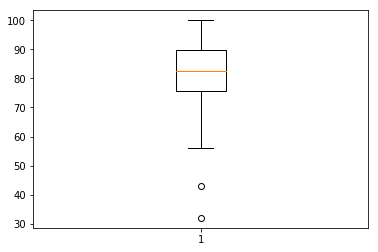

In [76]:
plt.boxplot(dfx, "grade", by="")

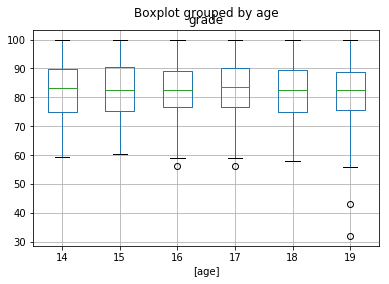

In [86]:
dfx.boxplot(column = "grade", by = ["age"])